<h1> California Wildland Fire Impacted Structures (2018-2024)</h1>

Analysis by **Evelyn Kadle** <br>
January 20, 2018 to February 7th, 2024 <br>

Client: **California Department of Forestry & Fire Protection**

Dataset obtained from **California Natural Resources Agency** and **Frontline Wildfire Defense** <br>
https://gis.data.cnra.ca.gov/datasets/CALFIRE-Forestry::cal-fire-damage-inspection-dins-data/about <br>
https://www.frontlinewildfire.com/wildfire-news-and-resources/california-wildfires-history-statistics/ <br>

--- 

#### **Purpose**

The goal of this project is to **minimize structural damage caused by wildfires**. By analyzing various **design factors** of structures previously affected by wildfires, along with the severity of damage different structures withstood, we gain valuable insights into how **future buildings can be constructed to minimize fire damage**. Key design elements, such as roof type, eaves, porches/decks, and more, play a critical role in **fire resilience**.

This analysis also heFrontline Wildfire Defenselps identify **areas most frequently impacted** by wildfires, enabling these regions to better prepare and mitigate the effects of future fires. By examining which months experience the most fires, we can enhance prevention strategies. Furthermore, understanding the financial impact of the affected structures offers a clearer picture of the **economic toll wildfires impose** on communities, underscoring the importance of addressing this issue.

---

#### **Dataset Overview**

This dataset represents **structures impacted by wildland fires** that are either **inside or within 100 meters** of the fire perimeter. It includes **records of structures damaged or destroyed by wildland fires in California**. Key details such as **structure type, construction features, and damage severity** are documented. In cases where structures are completely destroyed, these details are estimated to the best of the inspector’s ability.  

Data is recorded by inspectors based on field observations on the day of the fire, with additional updates added later for accuracy. Due to fire damage and accessibility challenges, **not all impacted structures may be identified**, leading to a **small margin of error** in the dataset.  

For consistency and accuracy, I will be using **data from 2018 to 2024** and **official addresses** rather than those recorded during inspections. This will provide **complete records and consistent data collection methods** for analysis. Additionally, structures damaged before 2013 do not have digital records, and prior to 2018, both damaged and destroyed structures were collected.  

---


#### **Tasks**

- Identify areas in California most likely to be affected by wildfires.
- Wildfires by year/Month in California (acres burned by wildfires)
- Analyze how different structural designs affect the severity of fire damage.
- Calculate the **average house price** of homes impacted by wildfires during this period.
- Investigate how various **types of structures** fare differently in wildfires.


---

<h2 style="color: blue;">Reading Files</h2>

In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

<h2 style="color: blue;">Data Dictionary</h2>

**Dictionary describes column names**

**_id:** A unique identifier for each record in the dataset.<br>
**DAMAGE:** Indicates the level of fire damage to the structure (e.g., "No Damage", "Affected (1-9%)"). <br>
**CALFIREUNIT:**  The CAL FIRE unit responsible for the area.<br>
**COUNTY:**  The county where the impacted structure is located.<br>
**COMMUNITY:**  The community or neighborhood of the structure.<br>
**Battalion:** consists of several fire stations and multiple fire companies <br>
**INCIDENT NAME:**  The name of the fire incident that impacted the structure.<br>
**Incident Number (e.g. CAAEU 123456):** Number assoiated with incedent.<br>
**Incident Start Date:** Date when incident started <br>
**Structure Defense Actions Taken:** what measures were used to help stop fire<br>
**Structure Type:** what type of structure was damaged<br>
**Structure Category:** what type of structure category was it <br>
**# Units in Structure (if multi unit):** When building is comprised of two (2) or more units (apartments,etc..) <br>
**Roof Construction:** what type of roof did the structure have<br>
**Eaves:** the edges of a roof that extend past the side of a building<br>
**Vent Screen:** mesh screens that fit over vents to keep out debris, animals, and insects<br>
**Exterior Siding:** covering for the outside of a house that's typically made of boards or sheets<br>
**window pane:** the glass sheets that make up a window<br>
**Deck/Porch On Grade:** Deck or porch(not raised/ground level) on structure<br>
**Deck/Porch Elevated:** Deck or porch that is elevated <br>
**Patio Cover/Carport Attached to Structure:** patio cover/roof attached to property?<br>
**Fence Attached to Structure** Fence attached?<br>
**Distance - Propane Tank to Structure:** Propane tank close to structure<br>
**Fire Name (Secondary):** Secondary fire name<br>
**ASSESSEDIMPROVEDVALUE:**  The assessed value of the improved property (e.g., structures, not just land).<br>
**YEARBUILT:**  The year the structure was built.<br>
**SITEADDRESS:**  The full address of the property, including city, state, and ZIP code.<br>
**Latitude:**  The latitude coordinate of the structure’s location.<br>
**Longitude:**  The longitude coordinate of the structure’s location.<br>
**FIRENAME:**  An alternative or secondary name for the fire incident.<br>

<h2 style="color: blue;">Reading Files</h2>

**California Natural Resources Agency** <br>
Data on structural damage caused by wildfire, will only use years 2018-2024 for analysis

In [428]:
df=pd.read_csv("cal_fire.csv",low_memory=False) 
df.head(2)

,_id,OBJECTID,* Damage,* Street Number,* Street Name,"* Street Type (e.g. road, drive, lane, etc.)","Street Suffix (e.g. apt. 23, blding C)",* City,State,Zip Code,...,Fire Name (Secondary),APN (parcel),Assessed Improved Value (parcel),Year Built (parcel),Site Address (parcel),GLOBALID,Latitude,Longitude,x,y
0,1,1,No Damage,8376.0,Quail Canyon,Road,NaN,Winters,CA,NaN,...,Quail,0101090290,510000.0,1997.0,8376 QUAIL CANYON RD VACAVILLE CA 95688,e1919a06-b4c6-476d-99e5-f0b45b070de8,38.474960,-122.044465,-1.358593e+07,4.646741e+06
1,2,2,Affected (1-9%),8402.0,Quail Canyon,Road,NaN,Winters,CA,NaN,...,Quail,0101090270,573052.0,1980.0,8402 QUAIL CANYON RD VACAVILLE CA 95688,b090eeb6-5b18-421e-9723-af7c9144587c,38.477442,-122.043252,-1.358579e+07,4.647094e+06


**Frontline Wildfire Defense** <br>
Data on number of wildfires and acrens burned **(Row for year 2024 individually added for consistency between files)**. Only using years 2018-2024

In [429]:
#Extracting table from the website by inspecting the HTML structure
html_table= "<table><tbody><tr><td><strong>Year</strong></td><td><strong>Number of Wildfires</strong></td><td><strong>Acres Burned</strong></td></tr><tr><td>1987</td><td>13,476</td><td>873,000</td></tr><tr><td>1988</td><td>13,290</td><td>345,000</td></tr><tr><td>1989</td><td>10,024</td><td>173,400</td></tr><tr><td>1990</td><td>10,548</td><td>365,200</td></tr><tr><td>1991</td><td>9,609</td><td>44,200</td></tr><tr><td>1992</td><td>12,047</td><td>282,745</td></tr><tr><td>1993</td><td>8,689</td><td>309,779</td></tr><tr><td>1994</td><td>10,269</td><td>526,219</td></tr><tr><td>1995</td><td>8,492</td><td>209,815</td></tr><tr><td>1996</td><td>10,610</td><td>752,372</td></tr><tr><td>1997</td><td>9,502</td><td>283,885</td></tr><tr><td>1998</td><td>7,572</td><td>215,412</td></tr><tr><td>1999</td><td>11,125</td><td>1,172,850</td></tr><tr><td>2000</td><td>7,622</td><td>295,026</td></tr><tr><td>2001</td><td>9,458</td><td>329,126</td></tr><tr><td>2002</td><td>8,328</td><td>969,890</td></tr><tr><td>2003</td><td>9,116</td><td>1,020,460</td></tr><tr><td>2004</td><td>8,415</td><td>264,988</td></tr><tr><td>2005</td><td>7,162</td><td>222,538</td></tr><tr><td>2006</td><td>8,202</td><td>736,022</td></tr><tr><td>2007</td><td>9,093</td><td>1,520,362</td></tr><tr><td>2008</td><td>6,255</td><td>1,593,690</td></tr><tr><td>2009</td><td>9,159</td><td>422,147</td></tr><tr><td>2010</td><td>6,554</td><td>109,529</td></tr><tr><td>2011</td><td>7,989</td><td>168,545</td></tr><tr><td>2012</td><td>7,950</td><td>869,599</td></tr><tr><td>2013</td><td>9,907</td><td>601,635</td></tr><tr><td>2014</td><td>7,865</td><td>625,540</td></tr><tr><td>2015</td><td>8,745</td><td>893,362</td></tr><tr><td>2016</td><td>6,986</td><td>669,534</td></tr><tr><td>2017</td><td>9,560</td><td>1,548,429</td></tr><tr><td>2018</td><td>8,527</td><td>1,975,086</td></tr><tr><td>2019</td><td>7,860</td><td>259,823</td></tr><tr><td>2020</td><td>9,639</td><td>4,397,809</td></tr><tr><td>2021</td><td>8,835</td><td>2,568,948</td></tr><tr><td>2022</td><td>7,490</td><td>362,455</td></tr><tr><td>2023</td><td>7,127</td><td>324,917</td></tr></tbody></table>"

# Reading the table into pandas
df2 = pd.read_html(io.StringIO(html_table))[0]
df2.columns = ["Year", "Number of Wildfires", "Acres Burned"]
df2 = df2[1:] 
df2_type_int = df2.astype(int)
years_of_fires = df2_type_int[df2_type_int['Year'] >= 2018]
df2_2018_above = years_of_fires.iloc[:,0:2]

#adding last year
new_row = {'Year': 2024, 'Number of Wildfires': 8024, 'Acres Burned': 1050012}
new_row_df = pd.DataFrame([new_row])  
# Concatenate with the existing DataFrame
years_of_fires = pd.concat([years_of_fires, new_row_df], ignore_index=True)
years_of_fires

,Year,Number of Wildfires,Acres Burned
0,2018,8527,1975086
1,2019,7860,259823
2,2020,9639,4397809
3,2021,8835,2568948
4,2022,7490,362455
5,2023,7127,324917
6,2024,8024,1050012


<h2 style="color: blue;">Cleaning Data</h2>

In [430]:
df.shape #rows,columns

(130529, 47)

##### **Dropping columns irrelevent to analysis** 
In this analysis, I opted to **modify the original DataFrame** without creating a separate copy before dropping columns. Given the **large dataset size and access to the original raw data** if needed, making a copy (df.copy()) would have been unnecessary and memory-intensive.
I **removed columns that were irrelevant to the analysis**, ensuring that only useful features remained for further processing. To optimize memory usage and efficiency, I used inplace=True to drop these columns directly.

In [431]:
df.drop(columns=['OBJECTID','* CAL FIRE Unit','* Street Number', '* Street Name','Battalion',
       '* Street Type (e.g. road, drive, lane, etc.)','Hazard Type',
       'Street Suffix (e.g. apt. 23, blding C)', 'State','If Affected 1-9% - Where did fire start?',
        'Zip Code','# of Damaged Outbuildings < 120 SQFT', 'If Affected 1-9% - What started fire?',
                 '# of Non Damaged Outbuildings < 120 SQFT','# Units in Structure (if multi unit)',
                 'Distance - Residence to Utility/Misc Structure &gt; 120 SQFT',
                 'GLOBALID','x','y'],inplace=True)

##### **Renaming column names**
Removing * from column names

In [432]:
df.columns = df.columns.str.replace(r'^\* ', '', regex=True)

##### **Finding Duplicates**

In [433]:
df[df.duplicated()]

,_id,Damage,City,County,Community,Incident Name,Incident Number (e.g. CAAEU 123456),Incident Start Date,Structure Defense Actions Taken,Structure Type,...,Patio Cover/Carport Attached to Structure,Fence Attached to Structure,Distance - Propane Tank to Structure,Fire Name (Secondary),APN (parcel),Assessed Improved Value (parcel),Year Built (parcel),Site Address (parcel),Latitude,Longitude


##### 0 Duplicates found

##### **Finding missing values** 
Large amounts of missing value is due to desrtoyed structures unable to save data on.<br>  County has 30 missing input values, given they had city and zipcode, these values were able to be input manually.

In [434]:
df.isnull().sum()

_id                                               0
Damage                                            0
City                                          31791
County                                           30
Community                                     75786
Incident Name                                     0
Incident Number (e.g. CAAEU 123456)               0
Incident Start Date                               0
Structure Defense Actions Taken               94891
Structure Type                                    0
Structure Category                                0
Roof Construction                               628
Eaves                                          1112
Vent Screen                                    1199
Exterior Siding                                 911
Window Pane                                     976
Deck/Porch On Grade                               0
Deck/Porch Elevated                               0
Patio Cover/Carport Attached to Structure         0
Fence Attach

In [435]:
df['City'] = df['City'].str.strip()
city_to_county = {'Brownsville':'yuba', 'Anza':'Riverside', 'California Hot Springs':'Tulare','Posey':'Tulare'}
df['County'] = df['County'].fillna(df['City'].map(city_to_county))

##### No more missing county values

In [436]:
df[df['County'].isnull()]

,_id,Damage,City,County,Community,Incident Name,Incident Number (e.g. CAAEU 123456),Incident Start Date,Structure Defense Actions Taken,Structure Type,...,Patio Cover/Carport Attached to Structure,Fence Attached to Structure,Distance - Propane Tank to Structure,Fire Name (Secondary),APN (parcel),Assessed Improved Value (parcel),Year Built (parcel),Site Address (parcel),Latitude,Longitude


##### **Turning date into datetime type**

In [443]:
df['Incident Start Date']= pd.to_datetime(df['Incident Start Date'],format='%Y-%m-%d').dt.normalize()

##### **Adding Columns**

In [440]:
df['Year'] = df['Incident Start Date'].dt.year
df['Month'] = df['Incident Start Date'].dt.month

##### **Getting years 2018 - 2024**

In [441]:
years_2018_2024 = df[(df['Year'] >= 2018) & (df['Year'] < 2025)]

<h2 style="color: blue;">Data Insights Through Analysis and Visuals</h2>

## **California's High-Risk Areas for Wildfire**  

**Figure 1** below highlights the **top counties in California** most affected by wildfires from **2018 to 2024**. **Butte County** stands out as the most severely impacted region, with **23,834 more recorded instances** of wildfire-related structural damage compared to **El Dorado County**, the second most affected area.  

**Butte County**, located north of **Sacramento**, consistently reports significantly higher wildfire damage than other regions. In fact, **three of the 15 largest wildfires** in California’s history have occurred within Butte County, which is consistent with the data shown below.  

The county’s high wildfire susceptibility is influenced by several factors, including:  
- **Hot and windy weather** during California's peak wildfire season  
- **Vegetation types** in the area that promote the spread of wildfires  

The **2018 Camp Fire**, which occurred in **Butte County**, remains the **most destructive wildfire** in California’s history, particularly in terms of **structural damage**.  

---  

### **Key Takeaways**  

- **Butte County** is the **most wildfire-prone county** in California, with a **significant increase** in wildfire damage compared to other regions.  
- The county has experienced **three of California's 15 largest wildfires**, with the **2018 Camp Fire** being the **deadliest and most destructive**.  
- Key factors contributing to Butte County’s vulnerability include **extreme weather conditions** and **vegetation types** that accelerate fire spread.  
- This underscores the need for **targeted wildfire mitigation** strategies in areas like Butte County to protect **structures and communities**.  


#### <span style="color:green">Figure 1</span>: **Top 10 Counties Affected by Wildfires**

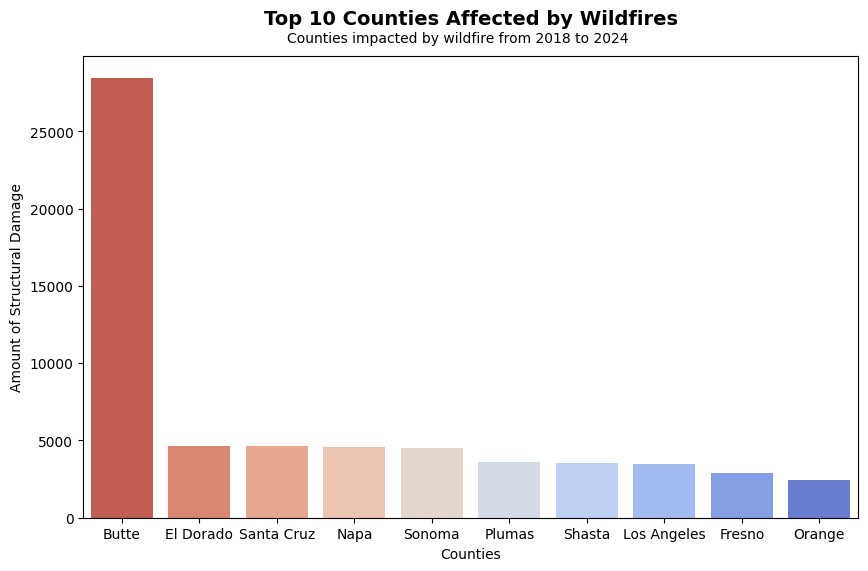

In [598]:
county_affected = years_2018_2024['County'].value_counts()
top_10 = county_affected.head(10).reset_index(name = 'Amount Affected')

plt.figure(figsize = (10,6))
sns.barplot(data=top_10, x='County', y='Amount Affected', hue = 'County', palette='coolwarm_r')

#Adding labels and title for clarity
plt.xlabel('Counties')
plt.ylabel('Amount of Structural Damage')

plt.title('Top 10 Counties Affected by Wildfires', fontsize=14, fontweight='bold',y=1.05, ha = 'center')
plt.suptitle('Counties impacted by wildfire from 2018 to 2024', fontsize=10, fontweight='light', y=.92, ha = 'center')
plt.savefig('Top 10 counties Affected by Wildfire.png')

plt.show()

## **Top Incident Names and Their Associated Counties**  

Focusing on the **most destructive wildfires** and their associated counties, the **2018 Camp Fire** remains the most devastating wildfire in **California’s history**, occurring in **Butte County**. This catastrophic event resulted in **unprecedented destruction**, making it the **deadliest and most destructive wildfire** the state has ever experienced.  

Further research into the **2018 Camp Fire** reveals its staggering impact:  
- **18,000+ structures destroyed**  
- **At least 85 lives lost**  
- **Tens of thousands of residents displaced**  

Comparing this to other major wildfires—such as the **Caldor Fire** and the **CZU Lightning Complex**—the **Camp Fire** stands out due to its **massive scale of destruction** and **tragic loss of life**. These extreme incidents highlight the **critical need for enhanced fire prevention, management, and community resilience strategies** to mitigate future wildfire disasters.  

---  

### **Key Takeaways**  

- **The 2018 Camp Fire in Butte County** remains the **most destructive and deadliest wildfire** in California’s history.  
- This single fire resulted in **more than 18,000 destroyed structures** and **forced thousands to evacuate**.  
- **Other major wildfires**—such as the **Caldor Fire** and **CZU Lightning Complex**—also caused severe damage, but none reached the scale of the **Camp Fire**.  
 


In [311]:
##Table 
Top_Fire_names = years_2018_2024['Incident Name'].value_counts().reset_index(name = 'Amount_fire_name').head()
Top_names = Top_Fire_names['Incident Name']
Top_fires = (years_2018_2024[years_2018_2024['Incident Name'].isin(Top_names)]
        .groupby(['County','Incident Name','Year'])
        .size()
        .reset_index(name = 'Fire Amount')
        .sort_values(by = 'Fire Amount',ascending = False))
Top_fires

,County,Incident Name,Year,Fire Amount
2,Butte,Camp,2018,23624
8,Santa Cruz,CZU Lightning Cmplx,2020,4613
3,El Dorado,Caldor,2021,4353
5,Napa,Glass,2020,2782
9,Solano,LNU Lightning Cmplx,2020,2251
10,Sonoma,Glass,2020,1985
6,Napa,LNU Lightning Cmplx,2020,1779
11,Sonoma,LNU Lightning Cmplx,2020,878
7,San Mateo,CZU Lightning Cmplx,2020,207
12,Yolo,LNU Lightning Cmplx,2020,161


#### <span style="color:green">Figure 2</span>: **Top Fire Damage by County and Incident Name**

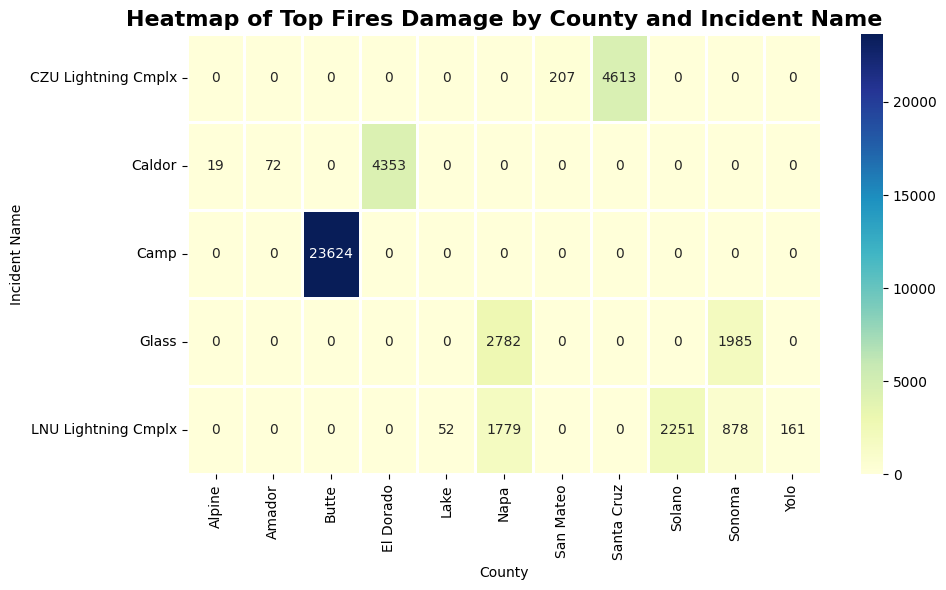

In [599]:
#Heatmap 
heatmap_damage_incident = Top_fires.pivot_table(values='Fire Amount', 
                                    index='Incident Name', 
                                    columns='County', 
                                    aggfunc='sum', 
                                    fill_value=0)

plt.figure(figsize=(10,6))
sns.heatmap(heatmap_damage_incident, annot=True, cmap='YlGnBu', fmt="g", linewidths=1)
plt.title('Heatmap of Top Fires Damage by County and Incident Name', fontsize=16, fontweight='bold')
plt.xlabel('County')
plt.ylabel('Incident Name')
plt.tight_layout()
plt.savefig('Wildfire Damage by County and Incident Name.png')
plt.show()


## **Wildfire Impact by Region in California**  

When analyzing the impact of wildfires from **2018 to 2024**, California was divided into **three regions**: **North, Central, and South**. This division—using **Santa Cruz as an approximate midpoint**—helps provide a clearer perspective on how wildfires have affected different parts of the state.  

The data reveals that **Northern California** has experienced a **significantly higher** level of wildfire damage compared to **Central** and **Southern California**. This is particularly evident in the **number of structures damaged**, where Northern California leads by a **staggering margin**.  

As shown in **Figure 1**, some of the most **heavily impacted counties**—including **Butte County**—are located in Northern California. Several factors contribute to this increased risk, including **dense vegetation, weather patterns, and regional geography**, which make Northern California more vulnerable to **large-scale, high-intensity wildfires**.  

---  

### **Key Takeaways**  

- **Northern California is the most affected region**, experiencing the highest wildfire damage and structural losses.  
- **Butte County and other Northern California counties** are among the top regions impacted by wildfires.  
- The **geography, vegetation, and climate** in Northern California make it more susceptible to **large, destructive fires**.  
- **Central and Southern California experience fewer severe wildfires**, but they are not entirely exempt from wildfire risk.   


In [453]:
#Showing impact by region

#Turn county_affected into df
#county_affected = years_2018_2024['County'].value_counts()
county_affected_df = county_affected.reset_index(name='Fire Damage Amount')
county_affected_df.columns = ['County', 'Fire Damage Amount']

# Define county regions
northern_ca = [
    "Butte", "El Dorado", "Santa Cruz", "Napa", "Sonoma", "Plumas", "Shasta", "Siskiyou", "Tehama", "Lassen",
    "Placer", "Santa Clara", "Lake", "Trinity", "Alpine", "Mendocino", "Yolo", "Nevada", "Humboldt", "Sacramento",
    "San Mateo", "Alameda", "Contra Costa"
]
central_ca = [
    "Fresno", "Solano", "Stanislaus", "Calaveras", "San Joaquin", "Amador", "Glenn", "Colusa", "Tuolumne",
    "San Benito", "Yuba", "Monterey", "Mariposa", "Madera", "Tulare", "Kern", "San Luis Obispo","Santa Barbara"
]
southern_ca = [
    "Los Angeles", "Orange", "Ventura", "Riverside", "San Bernardino", "San Diego", "Inyo"
]

# Function to classify county into a region
def classify_region(county):
    if county in northern_ca:
        return "Northern California"
    elif county in central_ca:
        return "Central California"
    elif county in southern_ca:
        return "Southern California"
    else:
        return "Unknown"

# Apply function to create new column
county_affected_df['Region'] = county_affected_df['County'].apply(classify_region)
county_affected_df.head()

,County,Fire Damage Amount,Region
0,Butte,28473,Northern California
1,El Dorado,4639,Northern California
2,Santa Cruz,4613,Northern California
3,Napa,4589,Northern California
4,Sonoma,4490,Northern California


In [359]:
#Need to group by Region and Sum the amount of Fire Damage per region
county_affected_df.groupby('Region')['Fire Damage Amount'].sum().reset_index().sort_values(by = 'Fire Damage Amount',ascending = False)

,Region,Fire Damage Amount
1,Northern California,61311
2,Southern California,10819
0,Central California,10586


#### <span style="color:green">Figure 3</span>: **California Regions Most Affected by Wildfire**

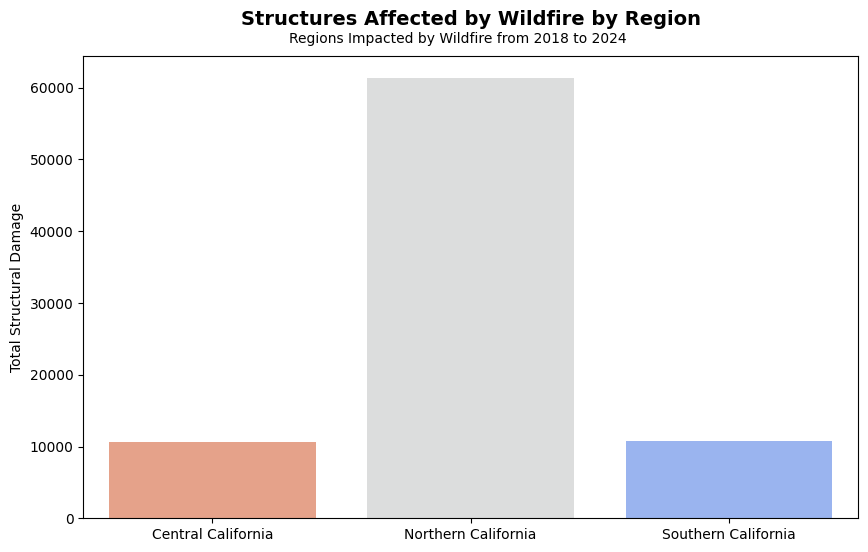

In [454]:
# Now, plot the grouped data
plt.figure(figsize=(10, 6))
sns.barplot(data=county_affected_grouped, x='Region', y='Fire Amount',hue = 'Region', palette='coolwarm_r')
plt.xlabel('')
plt.ylabel('Total Structural Damage')
plt.title('Structures Affected by Wildfire by Region', fontsize=14, fontweight='bold', y=1.05, ha='center')
plt.suptitle('Regions Impacted by Wildfire from 2018 to 2024', fontsize=10, fontweight='light', y=.92, ha='center')
plt.savefig('Wildfires by region.png')
plt.show()


## **Wildfire Trends by Month and Year**  

### **Trends by Month**  

Analyzing the graph of wildfires by month, we can observe that certain months show relatively **low wildfire activity**, specifically from **December to June**.  

The months of **July, August, and September** exhibit a sharp increase in wildfire activity in California, followed by a noticeable **decline in October**. Among these months, **August** stands out with significant wildfire incidents, including the **CZU Lightning Complex** and **LNU Lightning Complex**, both of which occurred in **2020**.  

The highest wildfire activity is observed in **November**, primarily driven by the **2018 Camp Fire**, the largest and most destructive wildfire in state history. This catastrophic event contributed significantly to the sharp increase in wildfires observed in November, as shown in the graph below.  

---  

### **Trends by Year**  

When looking at the annual trends, **2020** stands out as the year with the most significant increase in fire activity, with **1,779 more fires** compared to **2019**. This surge marked a significant peak in wildfire activity. Following this peak, wildfire incidents began to **gradually decline**, with **2021** seeing **804 fewer fires** compared to **2020**, and an even larger drop from **2021 to 2022**.  

The year **2020** also experienced some of the most **devastating fires**, including the **CZU Lightning Complex**, **Glass Fire**, and **LNU Lightning Complex**, all of which had a major impact on **Northern California**. By **2023**, the number of wildfires **drastically dropped** to just **7,127**, the **lowest recorded number of fires** in the period from **2018 to 2024**.  

---  

### **Key Takeaways**  

- **Seasonal wildfire patterns** indicate that peak fire activity occurs in **August through November**, with **November showing the highest spike** due to extreme fire incidents like the **2018 Camp Fire**.  
- **2020 was a historic year for wildfires**, with a dramatic surge in fire activity, likely due to a combination of extreme weather conditions, drought, and lightning-induced fire incidents.  
- **Post-2020, a steady decline in wildfire occurrences** suggests improvements in wildfire management, climate conditions, or prevention efforts.  
- **2023 had the lowest number of recorded wildfires**, marking a significant contrast to the peak in **2020**, potentially indicating a shift in wildfire trends or mitigation efforts.  

Understanding these trends is **critical for wildfire preparedness**, resource allocation, and developing strategies to mitigate wildfire damage in the most affected months and regions.  


#### <span style="color:green">Figure 4</span>: **Wildfire Damage Trends by Month and Year**

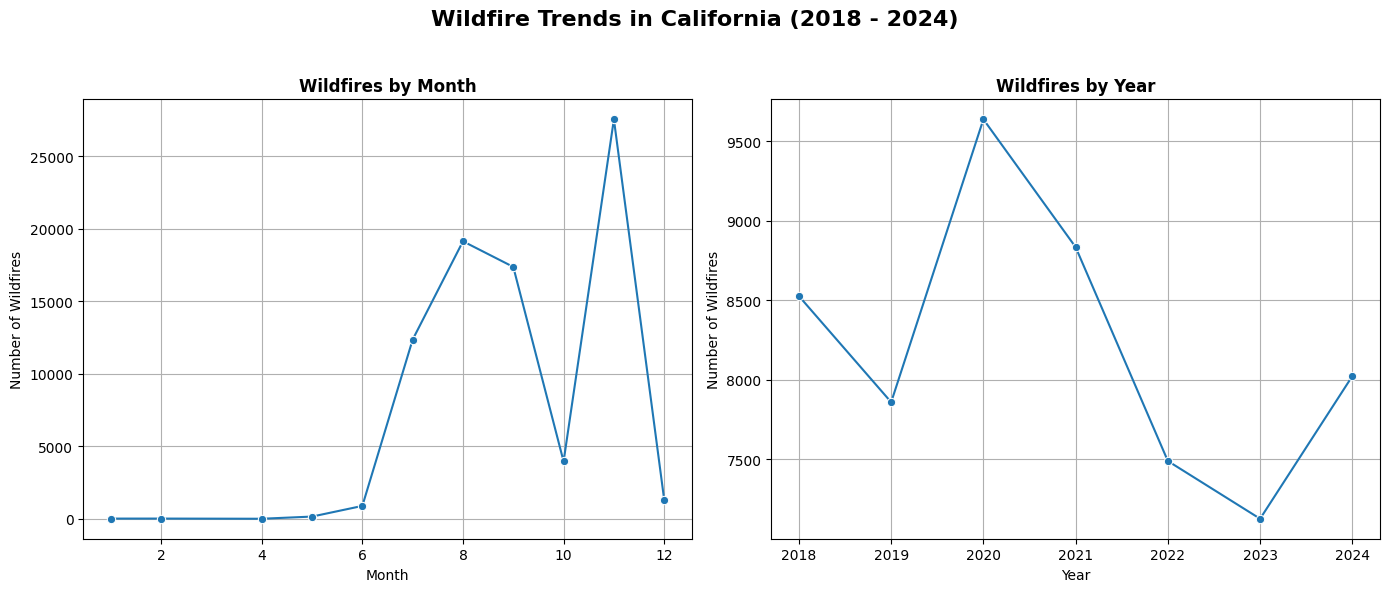

In [600]:
#years_of_fires = Frontline Wildfire Defense** Data for yearly amount of fires (Shown when importing data)
Month_fires = years_2018_2024['Month'].value_counts().reset_index(name = 'Fires per month')

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot - Wildfires Each Month
sns.lineplot(data=Month_fires, x='Month', y='Fires per month', marker='o', ax=axes[0])
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Wildfires')
axes[0].set_title('Wildfires by Month', fontsize=12, fontweight='bold')
axes[0].grid(True)

# Second plot - Wildfires Each Year
sns.lineplot(data=years_of_fires, x='Year', y='Number of Wildfires', marker='o', ax=axes[1])
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Wildfires')  # Keep the y-axis label for both plots
axes[1].set_title('Wildfires by Year', fontsize=12, fontweight='bold')
axes[1].grid(True)

# Add a main title
fig.suptitle('Wildfire Trends in California (2018 - 2024)', fontsize=16, fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title

# Save the combined figure
plt.savefig('Wildfires_Trends_month_year.png')

# Show the plots
plt.show()



## **Amount of Land Affected by Wildfires**  

The graph showing **Acres Burned per Year** aligns with the trend in the number of wildfires observed in **Figure 4**. The largest amount of land burned occurred in **2020**, primarily due to several devastating wildfires, including the **Camp Fire**, which significantly contributed to the acreage burned that year.  

From **2018 to 2020**, nearly **11 million acres** were burned due to wildfires. Of this, approximately **4 million acres** burned in **2020** alone—compared to just **259,823 acres** in **2019**—representing a **1,592% increase** in land affected. This dramatic surge underscores the severity of **2020**, with its extreme fire conditions and widespread destruction, leaving a lasting impact on both the environment and the communities affected.  

---  

### **Key Takeaways**  

- **2020 experienced the most land burned** in the observed period, correlating with the peak in wildfire occurrences.  
- The **1,592% increase** in burned acreage from **2019 to 2020** highlights the unprecedented severity of wildfires in 2020.  
- **Nearly 11 million acres burned** between **2018 and 2020**, demonstrating the destructive nature of wildfires in recent years.  
- The **Camp Fire and other major wildfires in 2020** were significant contributors to the spike in acreage burned.    


In [476]:
#Total acres burned
Acres_burned = years_of_fires.iloc[:, [0, 2]]
total_acres_burned = Acres_burned['Acres Burned'].sum()
print("{:,} Acres burned from 2018-2024".format(total_acres_burned))

10,939,050 Acres burned from 2018-2024


In [516]:
fire_2020 = years_of_fires[years_of_fires['Year'] == 2020]['Acres Burned'].iloc[0]
fire_2019 = years_of_fires[years_of_fires['Year'] == 2019]['Acres Burned'].iloc[0]
percentage_increase = round(((fire_2020 - fire_2019)/fire_2019)* 100,2)
print(percentage_increase,"% increase in acres burned 2019-2020")


1592.62 % increase in acres burned 2019-2020


#### <span style="color:green">Figure 5</span>: **Amount of Acres Burned per Year**

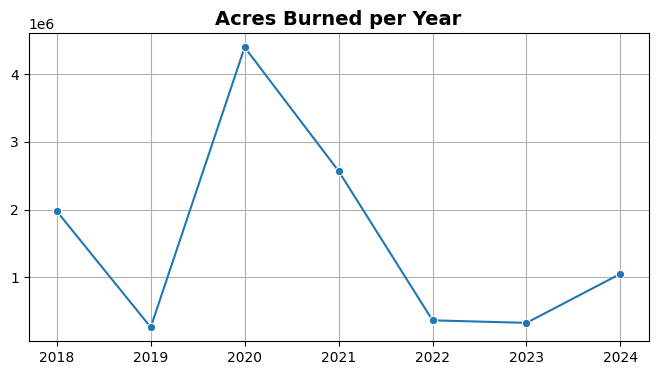

In [161]:
#figure 3
plt.figure(figsize = (8,4))
sns.lineplot(data = Acres_burned, x = 'Year', y = 'Acres Burned', marker = 'o')

plt.xlabel('')
plt.ylabel('')
plt.title('Acres Burned per Year', fontsize=14, fontweight='bold')
plt.savefig('Acres burned by year.png')
plt.grid(True)
plt.show()

## Average House Price of Homes Impacted by Wildfires

When analyzing the financial impact of wildfires on residential properties, there are **significant outliers** with both high- and low-priced homes, which affect the average. Using the **median** provides a more reliable measure of typical home values. To refine the analysis, the data was filtered to include only **home structures**, excluding other structures such as **utility buildings** and **commercial properties**.  

The dataset includes a wide range of home types, from **multi-/single-family residences** to **motor homes**. These variations in home types contribute to a broad price range, with **motor homes having a median value of 12,927**, while **multi-family residences have a median value of $240,824**. Due to this disparity, the **median home price per year remains mostly under \$200k**.  

Wildfires in California have disproportionately damaged **lower-valued homes**, but **high-value properties** have also been impacted. The **median home value of damaged properties** provides a clearer picture of typical losses, as the **mean is skewed by extreme outliers**.  

### **Key Findings**  
- The majority of homes affected by wildfires are valued under **\$200k** , indicating that **lower- to middle-class individuals** are disproportionately impacted.  
- The **highest median home price** for fire-damaged homes occurred in **2019**, with a median value of approximately **\$330K**.  
- In **2019**, the most affected counties included **Sonoma, Los Angeles, and Riverside**, areas with higher property values.  
- The distribution of home values is **right-skewed**, meaning that while most affected homes are lower in value, **some extreme high-value properties** have also been impacted.  
- **Outliers**, such as **luxury homes** and **mobile homes**, significantly affect the average, making the **median** a more reliable measure of central tendency than the mean.  
- Some extreme values—ranging from **\$0** to **\$394 million**—distort the average, reinforcing the importance of using the **median** instead.  


In [580]:
#Home_structure.groupby('Structure Type')['Assessed Improved Value (parcel)'].median()

In [559]:
years_2018_2024.loc[:,'Structure Type'] = years_2018_2024['Structure Type'].str.strip()
Home_structure = years_2018_2024[years_2018_2024['Structure Type'].isin(['Single Family Residence Single Story', 'Single Family Residence Multi Story', 
                           'Mobile Home Double Wide', 'Mobile Home Single Wide', 'Motor Home',
                            'Multi Family Residence Multi Story ', 'Multi Family Residence Single Story',
                            'Mobile Home Triple Wide',])]

In [556]:
pd.set_option('display.float_format', '{:.0f}'.format)
Home_structure.groupby('Year')['Assessed Improved Value (parcel)'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2018,20466,527203,10085699,0,66254,125460,227095,393602009
2019,1369,755556,1630203,136,135413,330847,790164,32723862
2020,15929,355486,1661670,0,51000,163022,343063,76315906
2021,7014,223260,676606,549,55000,122973,227490,16166587
2022,1851,193241,358870,0,37783,118024,225942,4700000
2023,144,143347,144588,0,49974,111224,198105,844098
2024,4741,366545,787609,0,56923,194068,424748,22301876


#### <span style="color:green">Figure 6</span>: **Homes Affected by Wildfire**

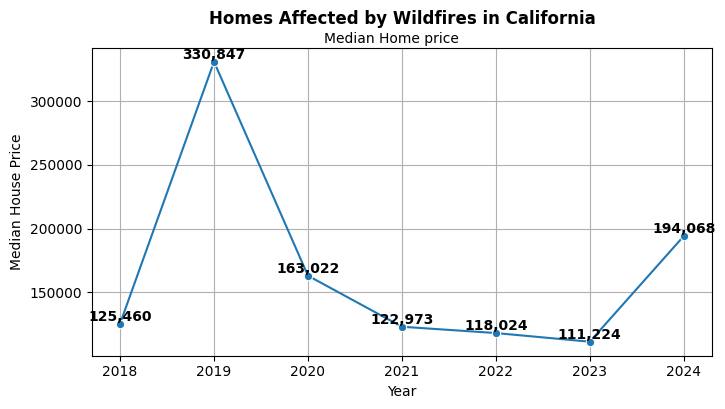

In [601]:
# Figure 
house_prices = Home_structure.groupby('Year')['Assessed Improved Value (parcel)'].median().reset_index(name = 'Median House Price')
house_prices['Median House Price'] = house_prices['Median House Price'].astype(int)

# Set figure size
plt.figure(figsize=(8, 4))

# Create line plot
ax = sns.lineplot(data=house_prices, x='Year', y='Median House Price', marker='o')

# Formatting
plt.xlabel('Year')
plt.ylabel('Median House Price')

# Add title
plt.title('Homes Affected by Wildfires in California', fontsize=12, fontweight='bold', y=1.05, ha = 'center')
plt.suptitle('Median Home price', fontsize=10, fontweight='light', y=.92, ha='center')

# Annotate each point with the actual value
for i, row in house_prices.iterrows():
    ax.text(row['Year'], row['Median House Price'], f'{row["Median House Price"]:,.0f}', 
            color='black', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Save and show plot
plt.grid(True)
plt.savefig('Price_of_homes_affected.png')
plt.show()

### **Structure Design in Relation to Fire Damage**  

In analyzing the differences in construction between **partially damaged** structures and those that were **>50% destroyed**, certain patterns emerge. However, it's important to acknowledge a **margin of error** in this dataset, as not all structural attributes were consistently recorded, and many common construction materials appear frequently due to their widespread use.  

Below are the most frequently occurring values for key construction attributes in fire-damaged structures:  

#### **Structures >50% Destroyed**  
For structures that were **severely damaged (>50%)**, the most common characteristics include:  
- **Roof Material:** Asphalt Shingles *(most commonly used roofing material)*  
- **Eaves:** Unenclosed *(open eaves that expose the underside of the roof, including rafters)*  
- **Vent Screen:** A mesh screen **larger than 1/8"**  
- **Exterior Siding:** Combustible material *(flammable exterior cladding)*  
- **Windows:** Multi-pane *(windows composed of multiple individual glass panes)*  
- **Deck/Porch:** Masonry/Concrete (Deck on ground level)  
- **Patio/Carport:** No attached structure  
- **Fence:** No attached fence  

#### **Structures with 1-25% Damage**  
For structures that experienced only **minor fire damage (1-25%)**, the only key difference observed was:   
- **Exterior Siding:** **Ignition-resistant siding** *(treated or manufactured to resist catching fire easily)*  

#### **Key Takeaway**  
From this analysis, **exterior siding material** appears to play a **critical role** in reducing fire damage. The use of **ignition-resistant siding** may significantly improve a homes resilience in wildfire-prone areas.  

This suggests that **adopting fire-resistant construction materials**, particularly for **siding**, could be an effective strategy for minimizing structural damage during wildfires.

#### **Structures that experienced >50% damages**

In [587]:
Homes_Destroyed = Home_structure[Home_structure['Damage'] == 'Destroyed (>50%)']
Homes_Destroyed[['Roof Construction', 'Eaves', 'Vent Screen', 'Exterior Siding',
       'Window Pane', 'Deck/Porch On Grade', 'Deck/Porch Elevated',
       'Patio Cover/Carport Attached to Structure',
       'Fence Attached to Structure']].replace("Unknown", pd.NA).dropna().mode()

,Roof Construction,Eaves,Vent Screen,Exterior Siding,Window Pane,Deck/Porch On Grade,Deck/Porch Elevated,Patio Cover/Carport Attached to Structure,Fence Attached to Structure
0,Asphalt,Unenclosed,"Mesh Screen > 1/8""""",Combustible,Multi Pane,Masonry/Concrete,No Deck/Porch,No Patio Cover/Carport,No Fence


#### **Structures that experienced 1-25% damages**

In [588]:
Homes_affected = Home_structure[Home_structure['Damage'].isin(['Affected (1-9%)','Minor (10-25%)'])]
Homes_affected[['Roof Construction', 'Eaves', 'Vent Screen', 'Exterior Siding',
       'Window Pane', 'Deck/Porch On Grade', 'Deck/Porch Elevated',
       'Patio Cover/Carport Attached to Structure',
       'Fence Attached to Structure']].mode()

,Roof Construction,Eaves,Vent Screen,Exterior Siding,Window Pane,Deck/Porch On Grade,Deck/Porch Elevated,Patio Cover/Carport Attached to Structure,Fence Attached to Structure
0,Asphalt,Unenclosed,"Mesh Screen > 1/8""""",Ignition Resistant,Multi Pane,Masonry/Concrete,No Deck/Porch,No Patio Cover/Carport,No Fence


## **Wildfire Damage Across Different Structure Types**  

Analyzing wildfire damage across different **structure categories**, damage severity is categorized into four levels:  
- **Affected (1-9%)**  
- **Minor (10-25%)**  
- **Major (26-50%)**  
- **Destroyed (>50%)**  

### **Key Findings:**  

1. **Single Residences are the Most Affected:**  
   - **25,646 single-family homes** were **destroyed (>50%)**, making them the most impacted structure type.  
   - The second highest category for **single residences** is **Affected (1-9%)**, with **1,745** homes experiencing minimal damage.  
   - While some homes sustained **minor (10-25%)** or **major (26-50%)** damage, the overwhelming majority were either **destroyed or lightly affected**.  

2. **Other Minor Structures Also Suffer High Destruction:**  
   - **10,792 structures** in this category were **destroyed (>50%)**, ranking second in terms of total destruction.  
   - These structures, likely including **sheds, small outbuildings, and detached garages**, are more vulnerable due to less fire-resistant materials.  

3. **Nonresidential Commercial Buildings:**  
   - While **1,494 structures** in this category were **destroyed (>50%)**, a notable **192 structures** only experienced **light damage (1-9%)**.  
   - This suggests that commercial buildings, depending on their fire-resistant materials and design, may sometimes withstand partial damage rather than complete destruction.  

4. **Infrastructure and Agriculture Suffer Minimal Losses:**  
   - **Infrastructure** saw **89 structures** **destroyed (>50%)**, with **46** experiencing only **minor damage (1-9%)**.  
   - **Agricultural buildings** had relatively low destruction rates, with only **three** reported as **completely destroyed**.  

### **Overall Trends:**  
- The **highest proportion of destruction (>50%)** is observed in **single residences** and **other minor structures**.  
- While some structure types, such as **infrastructure and agriculture**, show lower total destruction, **all categories have at least some level of damage**.  
- The number of **affected (1-9%)** structures is significantly lower than those that were **completely destroyed**, reinforcing the idea that wildfires often result in **total structural loss rather than partial damage**.  


#### <span style="color:green">Figure 7</span>: **Wildfire Damage Across Different Structure Types**

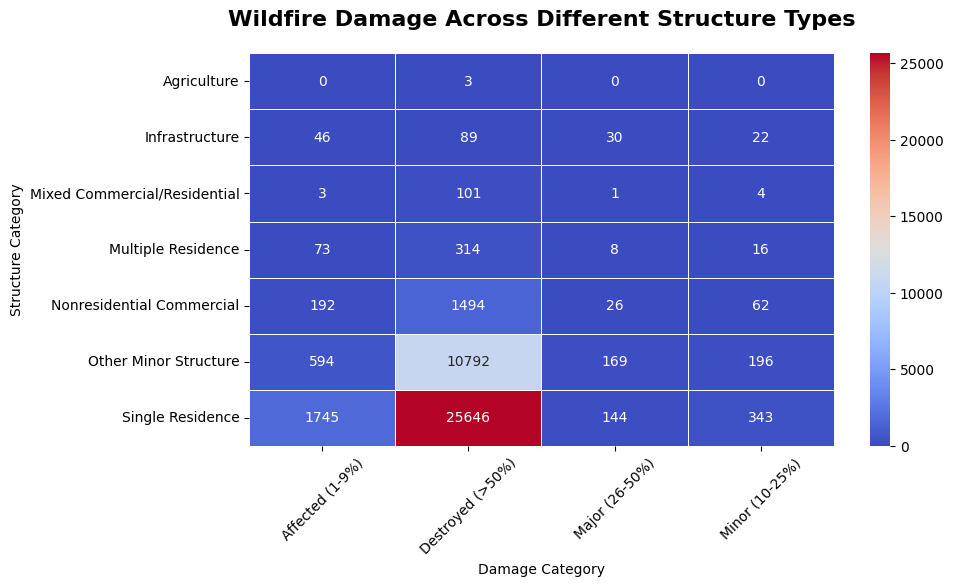

In [596]:
# Figure 1
Damaged_2018_2024 = years_2018_2024[~years_2018_2024['Damage'].isin(['No Damage', 'Inaccessible'])]
structure_df = Damaged_2018_2024.groupby('Structure Category')['Damage'].value_counts()
heatmap_data = structure_df.unstack(fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm", linewidths=.5)
plt.title("Wildfire Damage Across Different Structure Types",fontsize=16, fontweight = 'bold',y=1.05)
plt.ylabel("Structure Category")
plt.xlabel("Damage Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Wildfire damage by structure.png')

plt.show()

<h2 style="color: blue;">Exploratory Data Analysis</h2>

### **Correlations to Explore**

#### **Acres Burned vs. Number of Structures Destroyed**  

A correlation value of **0.10** suggests a **weak positive correlation** between the **number of structures destroyed** and **acres burned**. This indicates that as the number of acres burned increases, the number of structures destroyed tends to increase slightly. This findnig makes sense as the wider fire spreads the more it damages into surounding structures.   

However, this relationship may be influenced by **data limitations**, as not all destroyed structures are documented due to the **extensive destruction caused by wildfires**.


In [180]:
Amount_Destroyed = years_2018_2024['Year'].value_counts().reset_index(name = 'Structures Damaged')
Amount_Destroyed['Structures Damaged'].corr(years_of_fires['Acres Burned'])

np.float64(0.10196785666258973)

#### **Month vs. Structures Destroyed**  

A correlation of **0.46** indicates a **moderate positive correlation** between the **month** and the **number of structures destroyed by more than 50%**. This suggests that as the months progress from **January to December**, there is a tendency for an increase in the number of structures destroyed.  

However, since the correlation is not particularly strong (**closer to 1 would indicate a strong relationship**), other factors likely influence the extent of destruction beyond just the time of year.  

### **Key Insights:**  
- A **moderate positive correlation** suggests that wildfire destruction tends to be higher later in the year, but this pattern is not perfectly consistent.  
- This aligns with **fire season trends**, where peak wildfire activity often occurs in late summer and fall.  
- The relationship is not strictly linear, meaning some years may not follow this trend exactly.  
- A **regression plot** can visually represent this moderate trend, showing that while the month is somewhat linked to destruction levels, it is **not the sole determining factor**.  


In [234]:
Destroyed = years_2018_2024[years_2018_2024['Damage'] == 'Destroyed (>50%)']
Destroyed_Per_Month = Destroyed.groupby('Month').size().reset_index(name = 'Destroyed Structure')
#Destroyed_Per_Month

In [236]:
correlation = Destroyed_Per_Month['Month'].corr(Destroyed_Per_Month['Destroyed Structure'])
correlation

np.float64(0.4596597287472428)

#### <span style="color:green">Figure 8</span>: **Month vs Structures Destroyed (>50%)**

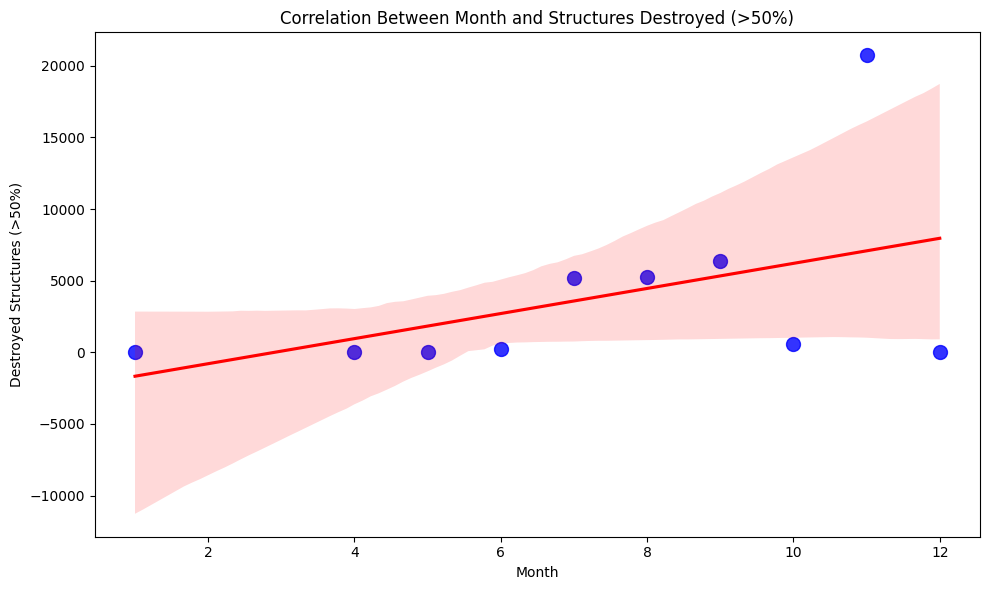

In [602]:
# Plotting a regression plot to show the correlation between Time of Month and Destroyed Structures
plt.figure(figsize=(10, 6))

# Using regplot to visualize the correlation
sns.regplot(x='Month', y='Destroyed Structure', data=Destroyed_Per_Month, scatter_kws={'s': 100, 'color': 'blue'}, line_kws={'color': 'red'})

# Adding title and labels
plt.title('Correlation Between Month and Structures Destroyed (>50%)')
plt.xlabel('Month')
plt.ylabel('Destroyed Structures (>50%)')
plt.savefig('Correlation between month and structures destroyed.png')
# Show the plot
plt.tight_layout()
plt.show()


<h2 style="color: blue;">Exporting Cleaned Data </h2>


In [387]:
years_after_2018.to_csv("cleaned Cal fire 2018-present.csv", index = False)